In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from pprint import pprint as pp

In [41]:
import pandas as pd
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [4]:
import matplotlib.pyplot as plt

# `confusion_matrix`
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html   
cols: predicted   
rows: true   
   
labels are automatically sorted   
can specify which ones and order using `labels`

### example 1

In [5]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [6]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [7]:
confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [8]:
confusion_matrix(y_true, y_pred, normalize='true')

array([[1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.33333333, 0.        , 0.66666667]])

In [9]:
confusion_matrix(y_true, y_pred, labels=[0, 2])

array([[2, 0],
       [1, 2]], dtype=int64)

### example 2

In [10]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

In [11]:
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [12]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

### example 3--extract individual values, only for binary case

In [13]:
y_true = [0, 1, 0, 1]
y_pred = [1, 1, 1, 0]

In [14]:
confusion_matrix(y_true, y_pred)

array([[0, 2],
       [1, 1]], dtype=int64)

In [15]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

# `plot_confusion_matrix`
uses iris dataset   

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Text(0.5, 1.0, 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


Text(0.5, 1.0, 'Normalized confusion matrix')

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


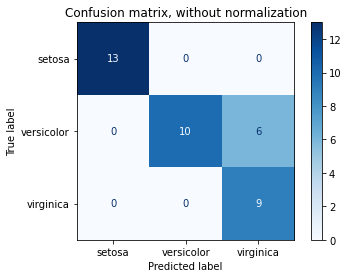

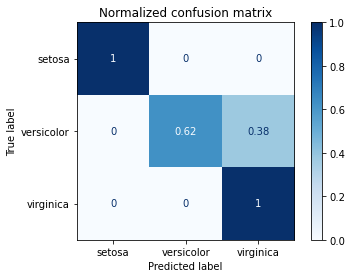

In [16]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# `classification_report`
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html   
### print report

In [17]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [18]:
y_pred = [1, 1, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.67      0.80         3
   macro avg       0.33      0.22      0.27         3
weighted avg       1.00      0.67      0.80         3



C:\Users\LoriN\anaconda3\envs\python3_7\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LoriN\anaconda3\envs\python3_7\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### get dictionary rather than printing

In [35]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['pine', 'oak', 'elm']
class_dict = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)

In [36]:
pp(class_dict)

{'accuracy': 0.6,
 'elm': {'f1-score': 0.8,
         'precision': 1.0,
         'recall': 0.6666666666666666,
         'support': 3},
 'macro avg': {'f1-score': 0.48888888888888893,
               'precision': 0.5,
               'recall': 0.5555555555555555,
               'support': 5},
 'oak': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 1},
 'pine': {'f1-score': 0.6666666666666666,
          'precision': 0.5,
          'recall': 1.0,
          'support': 1},
 'weighted avg': {'f1-score': 0.6133333333333334,
                  'precision': 0.7,
                  'recall': 0.6,
                  'support': 5}}


### make dataframe

In [54]:
dummy_line = {'model':'temp' , 'data':'test' , 'class':'green' ,
              'precision':0.1 , 'recall':0.2 , 'f1-score':0.4 , 'support':8}
df_class_report = pd.DataFrame(dummy_line, index=[0])
#df_class_report = pd.DataFrame()
df_class_report

for item in target_names:
    one_line = {'model':'log_reg', 'data':'test', 'class':item}
    one_line.update(class_dict[item])
    #one_line
    df_class_report = df_class_report.append(one_line, ignore_index=True)

df_class_report
df_class_report.drop(index=[0], inplace=True)
df_class_report

,model,data,class,precision,recall,f1-score,support
0,temp,test,green,0.1,0.2,0.4,8


,model,data,class,precision,recall,f1-score,support
0,temp,test,green,0.1,0.200000,0.400000,8
1,log_reg,test,pine,0.5,1.000000,0.666667,1
2,log_reg,test,oak,0.0,0.000000,0.000000,1
3,log_reg,test,elm,1.0,0.666667,0.800000,3


,model,data,class,precision,recall,f1-score,support
1,log_reg,test,pine,0.5,1.000000,0.666667,1
2,log_reg,test,oak,0.0,0.000000,0.000000,1
3,log_reg,test,elm,1.0,0.666667,0.800000,3


# `precision_recall_fscore_support`
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support   
   
### example 1
same data as 1st example in classification_report above   
gives same values as that example

In [21]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']

In [22]:
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.5, 0.5555555555555555, 0.48888888888888893, None)

In [23]:
precision_recall_fscore_support(y_true, y_pred, average='micro')

(0.6, 0.6, 0.6, None)

In [24]:
precision_recall_fscore_support(y_true, y_pred, average='weighted')

(0.7, 0.6, 0.6133333333333334, None)

### example 2

In [25]:
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])

In [26]:
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.2222222222222222, 0.3333333333333333, 0.26666666666666666, None)

In [27]:
precision_recall_fscore_support(y_true, y_pred, average='micro')

(0.3333333333333333, 0.3333333333333333, 0.3333333333333333, None)

In [28]:
precision_recall_fscore_support(y_true, y_pred, average='weighted')

(0.2222222222222222, 0.3333333333333333, 0.26666666666666666, None)

### example 3: by class rather than averaging

In [29]:
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])

In [30]:
precision_recall_fscore_support(y_true, y_pred, average=None, labels=['pig', 'dog', 'cat'])

(array([0.  , 0.  , 0.67]),
 array([0., 0., 1.]),
 array([0. , 0. , 0.8]),
 array([2, 2, 2], dtype=int64))